In [32]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names
˓→were

<item>
    <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
    <point> 100 </point>
</item>
<item>
    <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
    <point> 200 </point>
</item>
<item>
    <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
    <point> 300 </point>
</item>
and they lived at the bottom of a well.</p>
<p class="story">...</p>
"""


In [33]:
html_doc

'\n<html><head><title>The Dormouse\'s story</title></head>\n<body>\n<p class="title"><b>The Dormouse\'s story</b></p>\n<p class="story">Once upon a time there were three little sisters; and their names\n˓→were\n\n<item>\n    <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,\n    <point> 100 </point>\n</item>\n<item>\n    <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and\n    <point> 200 </point>\n</item>\n<item>\n    <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;\n    <point> 300 </point>\n</item>\nand they lived at the bottom of a well.</p>\n<p class="story">...</p>\n'

웹페이지가 바뀌면 파서기 다시돌리기

In [34]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
soup


<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names
˓→were

<item>
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
    <point> 100 </point>
</item>
<item>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
    <point> 200 </point>
</item>
<item>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
    <point> 300 </point>
</item>
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [35]:
#soup.find_all('item')
aList,pointList=[],[]
for item in soup.find_all('item'):
    #print('-'*100)
    a=item.a.text
    point=item.point.text

    aList.append(a)
    pointList.append(point)
    # print(item.a.text) #a에 텍스트만 가져옴
    # print(item.point.text) #point의 텍스트만 가져옴
    #print(item)   #a태그와 point 둘다가져옴

import pandas as pd
pd.DataFrame({'이름':aList,
'포인트':pointList})

,이름,포인트
0,Elsie,100
1,Lacie,200
2,Tillie,300


In [5]:
soup.point

<point> 100 </point>

In [6]:
soup.title, soup.a #첫번째 걸리는 a태그 보여줘

(<title>The Dormouse's story</title>,
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>)

In [7]:
soup.a, soup.a.text  # soup.a.text로 Elsie</a>,'Elsie')를 가져옴

(<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 'Elsie')

In [8]:
#####################중요############
for link in soup.find_all('a'): # a태그 다보여줘
    print(link.get('href'))


http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [9]:
for x in soup.find_all('a'): # 텍스트만 보여줘
    print(x.text)
for x in soup.find_all('point'): # 포인트 보여줘
    print(x.text)

Elsie
Lacie
Tillie
 100 
 200 
 300 


In [36]:
# 키분리과정
urlBase='https://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey='

key='fQ5%2BJjP8nebJ%2Fr4vy01z4JH53Ebn%2FKiYEDAKTaLmS36LJZsJVk6htJ9qu9PF65qg%2BLDuh9Bx1p4MA7qMUnDRHg%3D%3D'

urlElse='&pageNo=1&numOfRows=10&dataType=XML&dataCd=ASOS&dateCd=DAY&startDt='
startDate='20100101'
url2='&endDt='
endDate='20100601'
url3='&stnIds='

city='108'
url=urlBase+key+urlElse+startDate+url2+endDate+url3+city
url

'https://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=fQ5%2BJjP8nebJ%2Fr4vy01z4JH53Ebn%2FKiYEDAKTaLmS36LJZsJVk6htJ9qu9PF65qg%2BLDuh9Bx1p4MA7qMUnDRHg%3D%3D&pageNo=1&numOfRows=10&dataType=XML&dataCd=ASOS&dateCd=DAY&startDt=20100101&endDt=20100601&stnIds=108'

In [11]:
!pip install pyOpenSSL

In [12]:
import requests

url = 'http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList'
params ={'serviceKey' : '[서비스키]', 
'pageNo' : '1', 'numOfRows' : '10',
'dataType' : 'XML', 'dataCd' : 'ASOS', 'dateCd' : 'HR',
'startDt' : '20100101', 'startHh' : '01',
'endDt' : '20100601', 'endHh' : '01',
'stnIds' : '108' }

response = requests.get(url, params=params)
print(response.content)

b'<OpenAPI_ServiceResponse>\n\t<cmmMsgHeader>\n\t\t<errMsg>SERVICE ERROR</errMsg>\n\t\t<returnAuthMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnAuthMsg>\n\t\t<returnReasonCode>30</returnReasonCode>\n\t</cmmMsgHeader>\n</OpenAPI_ServiceResponse>'


In [37]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

urlBase='https://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey='

key='fQ5%2BJjP8nebJ%2Fr4vy01z4JH53Ebn%2FKiYEDAKTaLmS36LJZsJVk6htJ9qu9PF65qg%2BLDuh9Bx1p4MA7qMUnDRHg%3D%3D'

urlElse='&pageNo=1&numOfRows=10&dataType=XML&dataCd=ASOS&dateCd=DAY&startDt='
startDate='20100101'
url2='&endDt='
endDate='20100601'
url3='&stnIds='

city='108'
url=urlBase+key+urlElse+startDate+url2+endDate+url3+city
url

xml=requests.get(url)
soup=bs(xml.text,'html.parser')
soup
#soup.find_all('item')

SSLError: HTTPSConnectionPool(host='apis.data.go.kr', port=443): Max retries exceeded with url: /1360000/AsosDalyInfoService/getWthrDataList?serviceKey=fQ5%2BJjP8nebJ%2Fr4vy01z4JH53Ebn%2FKiYEDAKTaLmS36LJZsJVk6htJ9qu9PF65qg%2BLDuh9Bx1p4MA7qMUnDRHg%3D%3D&pageNo=1&numOfRows=10&dataType=XML&dataCd=ASOS&dateCd=DAY&startDt=20100101&endDt=20100601&stnIds=108 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_ILLEGAL_PARAMETER] ssl/tls alert illegal parameter (_ssl.c:1000)')))

In [20]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

url='https://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=fQ5%2BJjP8nebJ%2Fr4vy01z4JH53Ebn%2FKiYEDAKTaLmS36LJZsJVk6htJ9qu9PF65qg%2BLDuh9Bx1p4MA7qMUnDRHg%3D%3D&pageNo=1&numOfRows=10&dataType=XML&dataCd=ASOS&dateCd=DAY&startDt=20100101&endDt=20100601&stnIds=108'
xml=requests.get(url)
soup=bs(xml.text,'html.parser')
soup

SSLError: HTTPSConnectionPool(host='apis.data.go.kr', port=443): Max retries exceeded with url: /1360000/AsosDalyInfoService/getWthrDataList?serviceKey=fQ5%2BJjP8nebJ%2Fr4vy01z4JH53Ebn%2FKiYEDAKTaLmS36LJZsJVk6htJ9qu9PF65qg%2BLDuh9Bx1p4MA7qMUnDRHg%3D%3D&pageNo=1&numOfRows=10&dataType=XML&dataCd=ASOS&dateCd=DAY&startDt=20100101&endDt=20100601&stnIds=108 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_ILLEGAL_PARAMETER] ssl/tls alert illegal parameter (_ssl.c:1000)')))

### 실습

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import tqdm  #진행사항을 알리는 프로그레스바

In [2]:
sum=0
for x in tqdm(range(1000)):
    sum+=x

100%|██████████| 1000/1000 [00:00<00:00, 912797.39it/s]


In [22]:
pip install geopandas matplotlib


     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.1 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 524.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----------- ---------------------------- 0.3/1.1 MB 9.6 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.1 MB 7.2 MB/s eta 0:00:01
   -------------------------- ------------- 0.7/1.1 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.9 MB 2.0 MB/s eta 0:00:12
    --------------------------------------- 0.5/22.9 MB 5.6 MB/s eta 0:00:04
   - -------------------------------------- 0.8/22.9 MB 6.6 MB/s eta 0:00:04
   -- ------------------------------------- 1.3/22.9 MB 7.7 MB/s eta 0:00:03
   -- -----------

In [3]:
from time import sleep

In [14]:
#내용 보기
import requests
import json

url = 'https://smart.incheon.go.kr/server/rest/services/Hosted/군구별_고령인구비율_정보/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'

# Make the GET request
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    geojson_data = response.json()

    # Now you can work with the GeoJSON data as needed
    # For example, you can access properties like this:
    features = geojson_data.get('features', [])
    for feature in features:
        properties = feature.get('properties', {})
        print(properties)

else:
    print(f"Error: {response.status_code}")


{'f2012': 12.94, 'gradient': 0.19, 'SHAPE__Length': 188042.59483419493, 'objectid': 1, 'sig_kor_nm': '중구', 'f2017': 14.1, 'SHAPE__Area': 218897523.54984996}
{'f2012': 14.66, 'gradient': 0.45, 'SHAPE__Length': 28078.427440978878, 'objectid': 2, 'sig_kor_nm': '동구', 'f2017': 18.95, 'SHAPE__Area': 11056766.215650015}
{'f2012': 11.71, 'gradient': 0.39, 'SHAPE__Length': 32992.66941695106, 'objectid': 3, 'sig_kor_nm': '남구', 'f2017': 14.49, 'SHAPE__Area': 39525559.208050005}
{'f2012': 7.4, 'gradient': 0.25, 'SHAPE__Length': 68697.30114472246, 'objectid': 4, 'sig_kor_nm': '연수구', 'f2017': 8.63, 'SHAPE__Area': 80308390.60549998}
{'f2012': 8.41, 'gradient': 0.42, 'SHAPE__Length': 66437.70076554787, 'objectid': 5, 'sig_kor_nm': '남동구', 'f2017': 10.89, 'SHAPE__Area': 90173959.03834999}
{'f2012': 9.19, 'gradient': 0.43, 'SHAPE__Length': 44187.66001797636, 'objectid': 6, 'sig_kor_nm': '부평구', 'f2017': 11.85, 'SHAPE__Area': 51040601.48745004}
{'f2012': 7.21, 'gradient': 0.51, 'SHAPE__Length': 58318.37191

In [26]:
# 컬럼,로우 헤드보기
import requests
import geopandas as gpd

url = 'https://smart.incheon.go.kr/server/rest/services/Hosted/군구별_고령인구비율_정보/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'

# Make the GET request
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the GeoJSON response using geopandas
    geojson_data = response.json()
    gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

    # View the column names
    print("Column Names:")
    print(gdf.columns)

    # Optionally, view the first few rows of the GeoDataFrame
    print("\nFirst Few Rows:")
    print(gdf.head())

else:
    print(f"Error: {response.status_code}")


Column Names:
Index(['geometry', 'f2012', 'gradient', 'SHAPE__Length', 'objectid',
       'sig_kor_nm', 'f2017', 'SHAPE__Area'],
      dtype='object')

First Few Rows:
                                            geometry  f2012  gradient  \
0  MULTIPOLYGON (((126.51237 37.53426, 126.51208 ...  12.94      0.19   
1  POLYGON ((126.64479 37.49361, 126.64076 37.495...  14.66      0.45   
2  POLYGON ((126.65550 37.48384, 126.65499 37.484...  11.71      0.39   
3  POLYGON ((126.63493 37.43065, 126.63484 37.431...   7.40      0.25   
4  POLYGON ((126.71363 37.47665, 126.71314 37.477...   8.41      0.42   

   SHAPE__Length  objectid sig_kor_nm  f2017   SHAPE__Area  
0  188042.594834         1         중구  14.10  2.188975e+08  
1   28078.427441         2         동구  18.95  1.105677e+07  
2   32992.669417         3         남구  14.49  3.952556e+07  
3   68697.301145         4        연수구   8.63  8.030839e+07  
4   66437.700766         5        남동구  10.89  9.017396e+07  


In [32]:
#폰트조정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

### 시각화

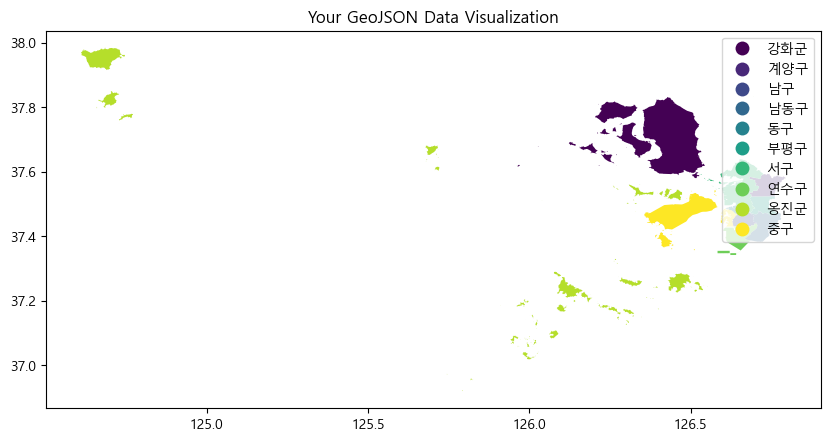

In [33]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

url = 'https://smart.incheon.go.kr/server/rest/services/Hosted/군구별_고령인구비율_정보/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'

# Make the GET request
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the GeoJSON response using geopandas
    geojson_data = response.json()
    gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

    # Plot the GeoDataFrame
    gdf.plot(column='sig_kor_nm', legend=True, cmap='viridis', figsize=(10, 8))
    plt.title('Your GeoJSON Data Visualization')
    plt.show()

else:
    print(f"Error: {response.status_code}")


### CSV로 저장

In [23]:
import requests
import csv

url = 'https://smart.incheon.go.kr/server/rest/services/Hosted/군구별_고령인구비율_정보/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'

# Make the GET request
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    geojson_data = response.json()

    # Extract properties from each feature
    features = geojson_data.get('features', [])
    data_to_write = []

    for feature in features:
        properties = feature.get('properties', {})
        data_to_write.append(properties)

    # Specify the CSV file path
    csv_file_path = 'output.csv'

    # Write the data to a CSV file
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = data_to_write[0].keys()
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write the header
        writer.writeheader()

        # Write the data
        for row in data_to_write:
            writer.writerow(row)

    print(f"CSV file saved to {csv_file_path}")

else:
    print(f"Error: {response.status_code}")


CSV file saved to output.csv


### 강사님 코드

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

url='https://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=fQ5%2BJjP8nebJ%2Fr4vy01z4JH53Ebn%2FKiYEDAKTaLmS36LJZsJVk6htJ9qu9PF65qg%2BLDuh9Bx1p4MA7qMUnDRHg%3D%3D&pageNo=1&numOfRows=10&dataType=XML&dataCd=ASOS&dateCd=DAY&startDt=20100101&endDt=20100601&stnIds=108'
xml=requests.get(url)
soup=bs(xml.text,'html.parser')
soup

In [15]:
########################################
### 전체데이터가 몇개인지 미리 알고 그 갯수를 전체데이터갯수에 넣으면 모든 자료 읽어올수 있음.
#######################################

xml=requests.get(url)
soup=bs(xml.text,'html.parser')
totCnt=soup.totalcount.text
totCnt


AttributeError: 'NoneType' object has no attribute 'text'

In [7]:
# 공공API 인증키 (부성순강사 인증키임. 본인자료는 다시 인증키 받아야함.)
def myUrlOpen(지점코드=108,totCnt=1,startDate='20100101',endDate='20100601'):
    인증키=' '
    지점코드=108   #서울
    url='https://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey='
    url=url+인증키
    url=url+ '&pageNo=1&numOfRows='
    url=url+str(totCnt)+'10&dataType=XML&dataCd=ASOS&dateCd=DAY&startDt='
    url=url+startDate+'&endDt='+endDate+'&stnIds='
    url=url+str(지점코드)
    print(url)
    return url


In [19]:
자료=[]
지점리스트={'지점명':['서울','부산','제주'],
              '지점코드': [108,253,184]}
jijumList,dataList,minList,maxList,rnList=[],[],[],[],[]

for 지점명,지점코드 in tqdm(zip(지점리스트['지점명'],지점리스트['지점코드'])):

    url=myUrlOpen(지점코드,totCnt)
    xml=requests.get(url)
    soup=bs(xml.text,'html.parser')
    data=soup.find_all('item')


    for item in data:
        jijum=지점명
        date=item.find('tm').text
        min=item.find('minta').text
        max=item.find('maxta').text
        rn=item.find('sumrn').text

        jijumList.append(jijum) ;dataList.append(date) ; maxList.append(max); minList.append(min) ; rnList.append(rn)

dataList=dict({'j':jijumList,
          'd':dataList,
          'm':maxList,
          'n':minList,
          'r':rnList})

In [10]:
print(지점리스트['지점명'])
fileName='_'.join(지점리스트['지점명'])   # 파일명으로 사용하기 위하여
fileName

['서울', '부산', '제주']


'서울_부산_제주'

In [9]:
#########################3
## 판다스로제작후 저장
#########################
df=pd.DataFrame(dataList)
df.to_csv(r'C:\Users\bluecom011\Desktop\Sesac\4주차\01.16/'+fileName+'.csv', encoding='utf-8',index=False)
df.tail()

""


In [ ]:
################
### json 파일로 저장
##################
import json
with open('c:/data/weather/날씨_'+fileName+'.json', 'w', encoding='utf-8') as f :
	json.dump(dataList, f, indent='\t',ensure_ascii=False)
